In [1]:
from train import train_prog_cycle_gan

START_TRAIN_IMG_SIZE: 4
TARGET_IMG_SIZE: 16
Z_DIM: 100
IN_CHANNELS: 256
IMG_CHANNELS: 3
BATCH_SIZE: 1
LEARNING_RATE: 0.0001
EPOCHS: 1
DEVICE: mps
NUM_STEPS: 3
SOURCE_DATASET: CELEBA
STYLE_DATASET: Vangogh
OUTPUT_DIR: outputs


In [2]:
working_dir, gen_A2B, gen_B2A = train_prog_cycle_gan()

Training at image size 4x4
Epoch [0/100] Batch 0 Loss D: 141.8457, loss G: 767.6832, alpha: 0.0010
Checkpoint saved at step 0, epoch 0.
Training at image size 8x8
Epoch [0/100] Batch 0 Loss D: 2.8962, loss G: 41.1276, alpha: 0.0010
Checkpoint saved at step 1, epoch 0.
Training at image size 16x16
Epoch [0/100] Batch 0 Loss D: 1.1699, loss G: 32.0367, alpha: 0.0010
Checkpoint saved at step 2, epoch 0.


In [3]:
from generator import GeneratorCycleGAN
from utils import load_genA2B

gen_A2B = GeneratorCycleGAN(in_channels=256, img_channels=3).to("mps")
generator = load_genA2B(
    "outputs/CELEBA to Vangogh 2024-12-07 02-14-13/checkpoint_step_2_epoch_0.pth",
    gen_A2B,
)

/Users/dhavalpotdar/Workarea/COMPSCI675D/Project/ProgCycleGAN/utils.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)


Checkpoint loaded from step 2, epoch 0.


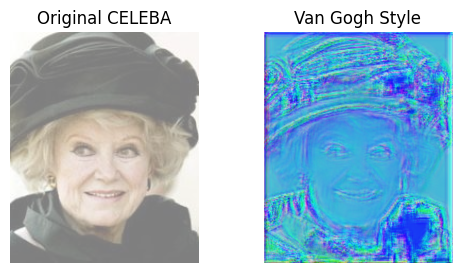

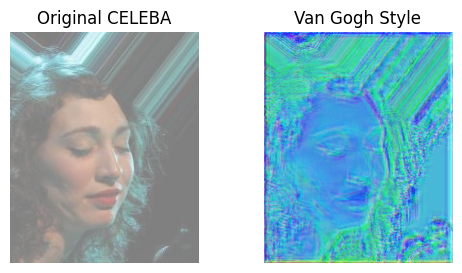

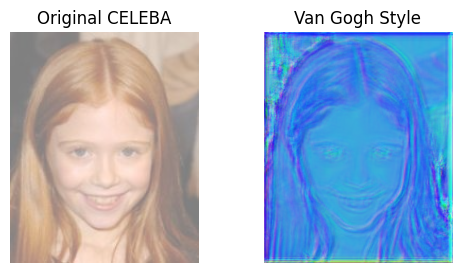

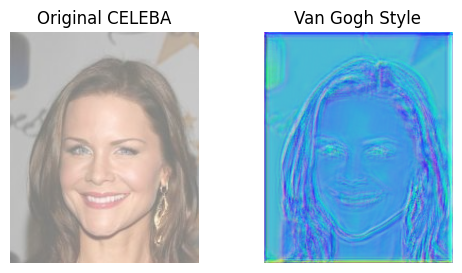

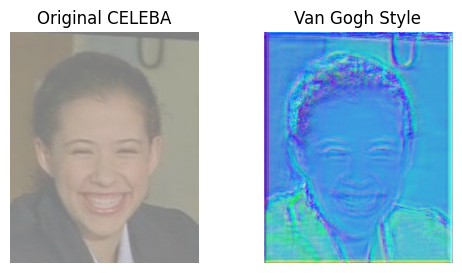

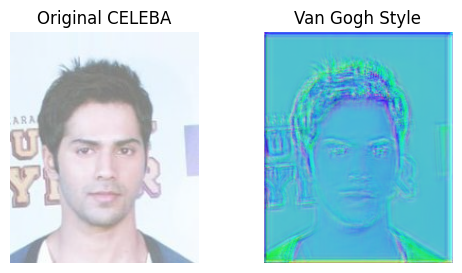

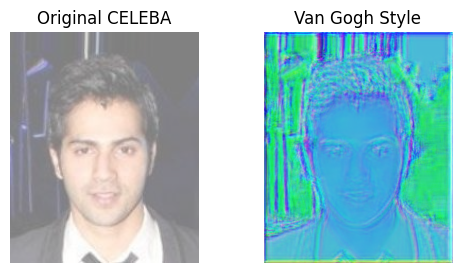

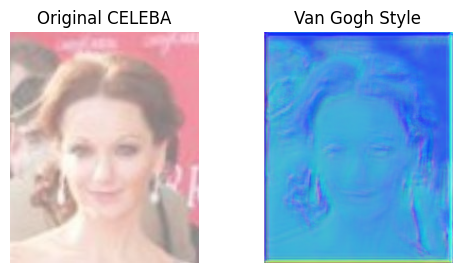

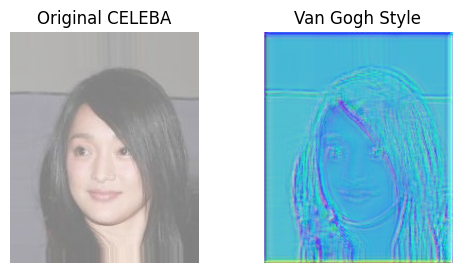

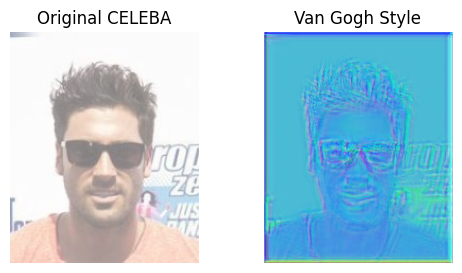

In [ ]:
from testloaders import test_on_celeba, test_on_cifar10

test_on_celeba(gen_A2B, 3)